C:\Users\Amin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6645 - loss: 0.7642
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7336 - loss: 0.7485
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 0.7101
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7281 - loss: 0.7232
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7584 - loss: 0.6733
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7961 - loss: 0.6366
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7298 - loss: 0.6473
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7654 - loss: 0.6124
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7475 - loss: 0.6013
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8335 - loss: 0.5644
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8496 - loss: 0.5425
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8520 - lo

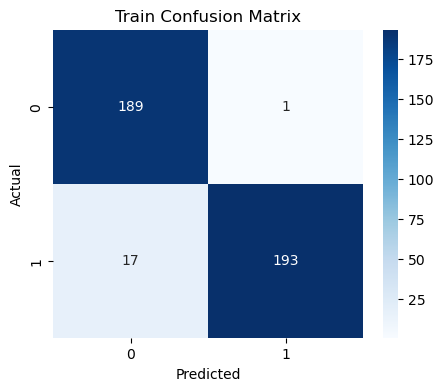

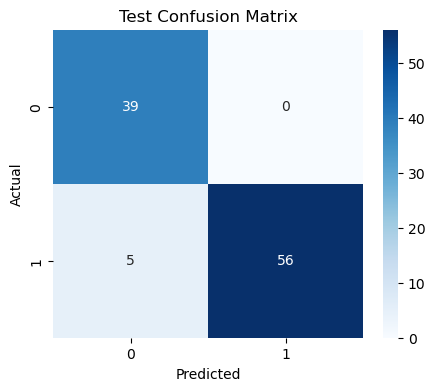

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9446 - loss: 0.1878 

Test Accuracy: 0.9500


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Excel file
file_path = "DataSetNew-GPS.xlsx"  # Change to your actual file path
df = pd.read_excel(file_path)

# Extract features and labels
X = df.iloc[:, :2].values  # First 2 columns as features
y = df.iloc[:, 2].values   # Third column as labels

# Select 500 random samples
np.random.seed(42)
indices = np.random.choice(len(X), 500, replace=False)
X_sample = X[indices]
y_sample = y[indices]

# Split into train (400) and test (100)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Normalize features (recommended for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(3, activation='relu', input_shape=(2,)),  # Hidden layer with 3 neurons
    Dense(1, activation='sigmoid')  # Output neuron (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Save and display the model structure
plot_model(model, to_file="MLP_Structure.png", show_shapes=True, show_layer_names=True)
print("MLP structure saved as 'MLP_Structure.png'.")

# Predict classes for train and test sets
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot and save confusion matrix
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.savefig(filename)
    plt.show()

# Plot and save train confusion matrix
plot_confusion_matrix(cm_train, "Train Confusion Matrix", "Confusion_Matrix_Train.png")

# Plot and save test confusion matrix
plot_confusion_matrix(cm_test, "Test Confusion Matrix", "Confusion_Matrix_Test.png")

# Print final test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
